In [10]:
from google.colab import drive
drive.mount('/content/gdrive/')
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


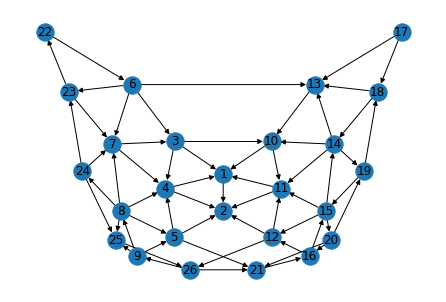

In [11]:
data_file = pd.read_csv('/content/gdrive/MyDrive/Topology Project/medium_graph.csv') 
G = nx.DiGraph()
for i in range(len(data_file)):
  G.add_edge(data_file['F'][i],data_file['T'][i])

G.add_edge(3,10)
G.add_edge(6,13)
G.add_edge(26,21)
G.add_edge(12,26)
G.add_edge(5,21)

G.add_edge(3,10)

# G.add_edge(22,10)

nx.draw_spectral(G, with_labels=True)

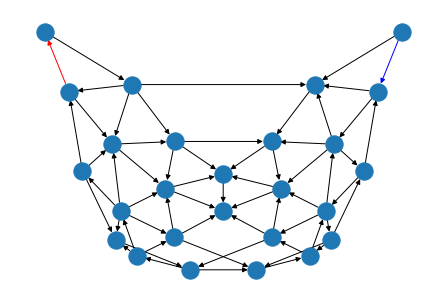

In [12]:
all_edges = list(G.edges)

color_of_node=[]
# all_classes = ['red', 'green', 'yellow']
# no_of_classes = len(all_classes)

for e in all_edges:
  if e==(23,22):
    color_of_node.append('red')
  elif e==(17,18):
    color_of_node.append('blue')
  else:
    color_of_node.append('black')

nx.draw_spectral(G, edge_color=color_of_node)
plt.show()

In [13]:
print(all_edges)

L_k_down = np.zeros((len(all_edges),len(all_edges)))
k = 1

for i in range(len(all_edges)):
  for j in range(len(all_edges)):
    if i==j:
      L_k_down[i][j] = k + 1 + G.degree[all_edges[j][0]]
    elif all_edges[i][0]==all_edges[j][1] or all_edges[i][1]==all_edges[j][0]:
      L_k_down[i][j] = -1
    elif all_edges[i][0]==all_edges[j][0] or all_edges[i][1]==all_edges[j][1]:
      L_k_down[i][j] = 1

[(1, 2), (3, 1), (3, 4), (3, 10), (4, 1), (4, 2), (10, 1), (10, 11), (11, 1), (11, 2), (5, 2), (5, 4), (5, 21), (12, 2), (12, 11), (12, 26), (6, 3), (6, 7), (6, 23), (6, 13), (7, 3), (7, 4), (8, 4), (8, 5), (8, 7), (8, 25), (8, 24), (9, 5), (9, 8), (9, 25), (13, 10), (14, 10), (14, 11), (14, 13), (14, 19), (15, 11), (15, 12), (15, 14), (15, 20), (16, 12), (16, 15), (17, 13), (17, 18), (18, 13), (18, 14), (19, 18), (19, 15), (20, 19), (20, 21), (20, 16), (21, 16), (22, 6), (23, 22), (23, 7), (24, 23), (24, 7), (24, 25), (25, 26), (26, 9), (26, 21)]


In [14]:
D_L = np.diag(np.diag(L_k_down))

D_L_inv = np.linalg.inv(D_L)

L_mult_D_L_inv = np.dot(L_k_down,D_L_inv)

In [15]:
temp_arr = []
for i in range(len(all_edges)):
  var = 0
  for j in range(len(all_edges)):
    if i!=j:
      var+=np.abs((L_mult_D_L_inv.T)[i][j])
  temp_arr.append(var)

K = max(temp_arr)
print(K)
p = 0.9

one_minus_p = 1 - p
den = p * (K - 1) + 1
A_cap = np.identity(len(all_edges)) - (one_minus_p/den) * np.array(L_mult_D_L_inv)

1.3333333333333333


In [16]:
f_blue = []
f_red = []

for i in range(len(all_edges)):
  t = np.random.uniform(-1000, 1000, 1)[0]
  f_blue.append(t)
  
  t_1 = np.random.uniform(-1000, 1000, 1)[0]
  f_red.append(t_1)

f_blue[all_edges.index((23,22))] , f_red[all_edges.index((23,22))] = 0, 1
f_blue[all_edges.index((17,18))] , f_red[all_edges.index((17,18))] = 1, 0


In [17]:
for t in range(280):
  f_blue = np.dot(A_cap,f_blue)
  f_red = np.dot(A_cap,f_red)
  
  f_blue[all_edges.index((23,22))] , f_red[all_edges.index((23,22))] = 0, 1
  f_blue[all_edges.index((17,18))] , f_red[all_edges.index((17,18))] = 1, 0

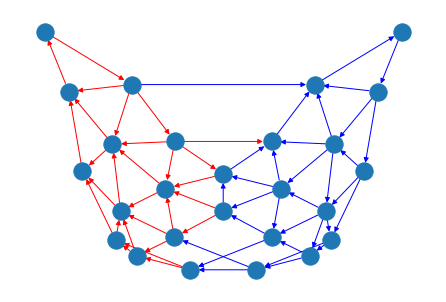

In [18]:
for edge in all_edges:
  if np.abs(f_blue[all_edges.index(edge)]) > np.abs(f_red[all_edges.index(edge)]):
    G[edge[0]][edge[1]]['color']='blue'
    
    if f_blue[all_edges.index(edge)] < 0:
      col = G[edge[0]][edge[1]]['color']
      G.remove_edge(edge[0],edge[1])
      G.add_edge(edge[1],edge[0],color=col)

  elif np.abs(f_blue[all_edges.index(edge)]) < np.abs(f_red[all_edges.index(edge)]):
    G[edge[0]][edge[1]]['color']='red'

    if f_red[all_edges.index(edge)] < 0:
      col = G[edge[0]][edge[1]]['color']
      G.remove_edge(edge[0],edge[1])
      G.add_edge(edge[1],edge[0],color=col)


colors = nx.get_edge_attributes(G,'color').values()
nx.draw_spectral(G,edge_color=colors)
plt.show()